In [1]:
import spatialdata as sd
import numpy as np
import matplotlib.pyplot as plt
import spatialdata_plot
from spatialdata import bounding_box_query
from skimage import io
import warnings

warnings.filterwarnings("ignore")

sdata = sd.read_zarr(
    "/work/rwth1209/projects/Spacehack_2023/visium_hd/colon_cancer.zarr"
)

/work/rwth1209/enviroments/spatial_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/work/rwth1209/enviroments/spatial_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/work/rwth1209/enviroments/spatial_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/work/rwth1209/enviroments/spatial_data/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


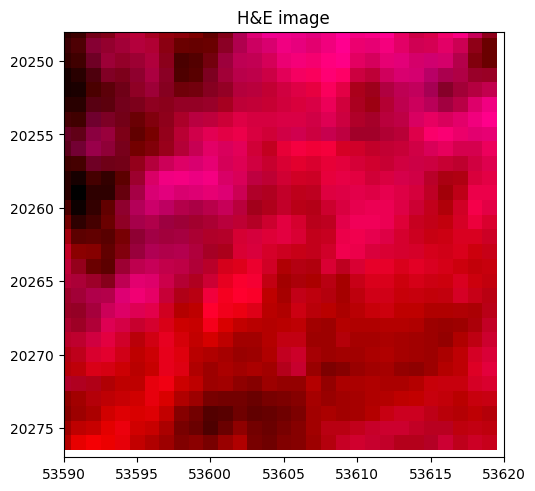

In [18]:
crop0 = lambda x: bounding_box_query(
    x,
    min_coordinate=[min_x, min_y],
    max_coordinate=[max_x, max_y],
    axes=("x", "y"),
    target_coordinate_system="global",
)

crop0(sdata).pl.render_images("Visium_HD_Human_Colon_Cancer_full_image").pl.show(
    title="H&E image", coordinate_systems="global"
)

In [22]:
img = sdata.images["Visium_HD_Human_Colon_Cancer_full_image"]["/scale0"]["image"].values
img = np.moveaxis(img, 0, -1)
img.shape

(48740, 75250, 3)

(29, 29, 3)

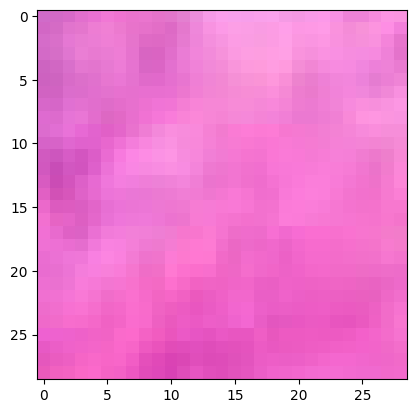

In [27]:
cropped_img = img[int(min_y) : int(max_y), int(min_x) : int(max_x)]
cropped_img.shape
plt.imshow(cropped_img)

In [57]:
radius = 14.604299
for i, poly in polys.iterrows():
    try:
        center = poly[0]
        min_x = center.x - radius
        max_x = center.x + radius
        min_y = center.y - radius
        max_y = center.y + radius
        cropped_img = img[int(min_y) : int(max_y), int(min_x) : int(max_x)]
        barcode = sdata.tables["square_008um"].obs.index[i]
        io.imsave(
            f"/work/rwth1209/projects/hackathon_ghent/cell_images/{barcode}.png",
            cropped_img,
            check_contrast=False,
        )
    except Exception as e:
        print(f"Failed for {barcode}")
        print(e)

Failed for s_008um_00773_00501-1
tile cannot extend outside image
Failed for s_008um_00773_00504-1
tile cannot extend outside image
Failed for s_008um_00773_00520-1
tile cannot extend outside image
Failed for s_008um_00773_00500-1
tile cannot extend outside image
Failed for s_008um_00773_00505-1
tile cannot extend outside image
Failed for s_008um_00772_00488-1
tile cannot extend outside image
Failed for s_008um_00773_00515-1
tile cannot extend outside image
Failed for s_008um_00773_00502-1
tile cannot extend outside image
Failed for s_008um_00773_00512-1
tile cannot extend outside image
Failed for s_008um_00773_00513-1
tile cannot extend outside image
Failed for s_008um_00773_00511-1
tile cannot extend outside image
Failed for s_008um_00773_00499-1
tile cannot extend outside image
Failed for s_008um_00772_00486-1
tile cannot extend outside image
Failed for s_008um_00773_00514-1
tile cannot extend outside image
Failed for s_008um_00773_00496-1
tile cannot extend outside image
Failed for